<a href="https://colab.research.google.com/github/amaansiddiqui-bit/Data_visualization_using_Python/blob/main/Bottleneck_Detection_in_IoT_using_LSTM_and_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading Data


In [2]:
import pandas as pd
df = pd.read_csv('/content/Datasets.csv')
df

,ID,Sender_IP,Sender_Port,Target_IP,Target_Port,Transport_Protocol,Duration,AvgDuration,PBS,AvgPBS,TBS,PBR,AvgPBR,TBR,Missed_Bytes,Packets_Sent,Packets_Received,SRPR,class
0,10.42.0.211-104.97.95.172-59522-80-6,192.168.2.112,2142,75.126.101.175,443,1,4.28,6.039028,1174,856.833333,1894,11862,27450.722220,12462,0,18,15,0.833333,0
1,216.58.217.68-10.42.0.211-443-59345-6,147.32.84.170,2108,208.100.48.73,22,1,3.00,1.500000,0,0.000000,192,0,0.000000,0,0,4,0,0.000000,1
2,10.42.0.151-54.192.38.7-52510-443-6,147.32.84.170,3805,125.14.233.194,22,1,0.00,1.500000,0,0.000000,96,0,0.000000,0,0,2,0,0.000000,1
3,216.58.219.206-10.42.0.42-443-53294-6,147.32.84.180,3008,205.188.146.193,25,1,2.96,2.021923,0,0.000000,96,0,0.000000,0,0,2,0,0.000000,1
4,10.42.0.1-10.42.0.42-53-62597-17,147.32.84.160,11697,184.173.217.40,443,1,0.15,0.159373,0,0.000000,96,0,0.000000,40,0,2,1,0.500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5467,10.42.0.211-119.146.74.34-36834-80-6,192.168.4.121,51163,65.54.81.171,80,1,15.08,14.057467,596,580.106667,848,166,162.240000,338,0,6,4,0.666667,1
5468,172.217.10.227-10.42.0.151-443-55235-6,158.65.110.24,54167,158.65.12.103,53,2,0.00,0.012399,35,38.840843,63,110,141.052849,0,0,1,0,0.000000,1
5469,10.42.0.211-54.192.38.236-54577-443-6,147.32.84.180,1025,147.32.80.9,53,2,0.12,9.772956,76,356.485402,132,219,927.129562,247,0,2,1,0.500000,1
5470,10.42.0.211-104.88.89.135-41161-443-6,192.168.4.118,1910,59.106.111.134,80,1,0.45,0.566667,64,54.333333,272,182,3572.000000,350,0,5,4,0.800000,1


Data Preprocessing

In [3]:
df.describe()

,Sender_Port,Target_Port,Transport_Protocol,Duration,AvgDuration,PBS,AvgPBS,TBS,PBR,AvgPBR,TBR,Missed_Bytes,Packets_Sent,Packets_Received,SRPR,class
count,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5.472000e+03,5472.000000,5.472000e+03,5.472000e+03,5.472000e+03,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000
mean,16649.802997,3544.247259,1.389072,12.964750,21.341809,317.964547,7.298220e+02,759.547332,1.300414e+04,1.322517e+04,1.315962e+04,462.317069,10.211075,11.732822,0.711110,0.629934
std,18265.060508,9404.524921,0.487584,305.059762,883.079233,3732.302430,1.863939e+04,6924.407943,1.847461e+05,1.312337e+05,1.880511e+05,17168.330107,104.135551,111.630205,0.601317,0.482866
min,53.000000,21.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2690.000000,53.000000,1.000000,0.050000,0.218569,0.000000,2.875000e+01,80.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000
50%,4840.500000,80.000000,1.000000,0.480000,1.500000,49.000000,5.604888e+01,120.000000,1.010000e+02,1.892578e+02,1.240000e+02,0.000000,2.000000,1.000000,0.833333,1.000000
75%,32245.000000,139.000000,2.000000,3.060000,7.583472,103.000000,1.414228e+02,361.250000,6.792500e+02,3.805434e+03,8.380000e+02,0.000000,6.000000,5.000000,1.000000,1.000000
max,65522.000000,65500.000000,2.000000,22083.710000,65178.233330,156289.000000,1.062472e+06,325674.000000,8.986288e+06,6.142982e+06,9.231445e+06,864072.000000,6561.000000,6510.000000,8.000000,1.000000


In [4]:
#checking totall Null values in the dataset
df.isnull().sum()

ID                    0
Sender_IP             0
Sender_Port           0
Target_IP             0
Target_Port           0
Transport_Protocol    0
Duration              0
AvgDuration           0
PBS                   0
AvgPBS                0
TBS                   0
PBR                   0
AvgPBR                0
TBR                   0
Missed_Bytes          0
Packets_Sent          0
Packets_Received      0
SRPR                  0
class                 0
dtype: int64

In [5]:
#checking if there's any duplicate value(s)
df.duplicated().sum()

0

In [6]:

import ipaddress

# Function to convert IPv4 address to integer using ipaddress module
def ip_to_int(ip_address):
    return int(ipaddress.IPv4Address(ip_address))

df_copy = df.copy()

# Convert 'Sender_IP' and 'Target_IP' columns to integers and assign the results back
df_copy['Sender_IP'] = df_copy['Sender_IP'].map(ip_to_int)
df_copy['Target_IP'] = df_copy['Target_IP'].map(ip_to_int)

In [7]:
#Dropping the ID column
df_copy = df_copy.drop('ID', axis = 1)


In [8]:
#saving the pre processed df_copy as Dataset
file_path = r"C:\Users\Mohammed Amaan\Downloads\Dataset.csv"
df_copy.to_csv(file_path, index=False)

Training

In [9]:
df_copy

,Sender_IP,Sender_Port,Target_IP,Target_Port,Transport_Protocol,Duration,AvgDuration,PBS,AvgPBS,TBS,PBR,AvgPBR,TBR,Missed_Bytes,Packets_Sent,Packets_Received,SRPR,class
0,3232236144,2142,1266574767,443,1,4.28,6.039028,1174,856.833333,1894,11862,27450.722220,12462,0,18,15,0.833333,0
1,2468369578,2108,3496226889,22,1,3.00,1.500000,0,0.000000,192,0,0.000000,0,0,4,0,0.000000,1
2,2468369578,3805,2098129346,22,1,0.00,1.500000,0,0.000000,96,0,0.000000,0,0,2,0,0.000000,1
3,2468369588,3008,3451687617,25,1,2.96,2.021923,0,0.000000,96,0,0.000000,0,0,2,0,0.000000,1
4,2468369568,11697,3098401064,443,1,0.15,0.159373,0,0.000000,96,0,0.000000,40,0,2,1,0.500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5467,3232236665,51163,1094078891,80,1,15.08,14.057467,596,580.106667,848,166,162.240000,338,0,6,4,0.666667,1
5468,2655088152,54167,2655063143,53,2,0.00,0.012399,35,38.840843,63,110,141.052849,0,0,1,0,0.000000,1
5469,2468369588,1025,2468368393,53,2,0.12,9.772956,76,356.485402,132,219,927.129562,247,0,2,1,0.500000,1
5470,3232236662,1910,996831110,80,1,0.45,0.566667,64,54.333333,272,182,3572.000000,350,0,5,4,0.800000,1


In [10]:
# Separate features and target variable
X = df_copy.drop('class', axis=1)
y = df_copy['class']

In [11]:
# Splitting the data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=43)

In [12]:
X.shape

(5472, 17)

In [13]:
y.shape

(5472,)

In [14]:
#using min max scaler to standardize the values in X
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten, TimeDistributed, Softmax



# Reshape features for 1D CNN input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(units=64, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(units=32, activation='relu')))
model.add(LSTM(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_reshaped, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

Epoch 1/50
139/139 [==============================] - 6s 14ms/step - loss: 0.6443 - accuracy: 0.6380 - val_loss: 0.5411 - val_accuracy: 0.7627
Epoch 2/50
139/139 [==============================] - 2s 12ms/step - loss: 0.4819 - accuracy: 0.7777 - val_loss: 0.4677 - val_accuracy: 0.8053
Epoch 3/50
139/139 [==============================] - 2s 11ms/step - loss: 0.4260 - accuracy: 0.7800 - val_loss: 0.3925 - val_accuracy: 0.8093
Epoch 4/50
139/139 [==============================] - 2s 12ms/step - loss: 0.3923 - accuracy: 0.7842 - val_loss: 0.3646 - val_accuracy: 0.8073
Epoch 5/50
139/139 [==============================] - 2s 16ms/step - loss: 0.3626 - accuracy: 0.7766 - val_loss: 0.3396 - val_accuracy: 0.7951
Epoch 6/50
139/139 [==============================] - 3s 19ms/step - loss: 0.3514 - accuracy: 0.7863 - val_loss: 0.3213 - val_accuracy: 0.8032
Epoch 7/50
139/139 [==============================] - 2s 11ms/step - loss: 0.3509 - accuracy: 0.7838 - val_loss: 0.3586 - val_accuracy: 0.7809

In [16]:
## PRedictions
predictions = model.predict(X_test_reshaped)
# Assuming you have binary classification
prediction = (predictions > 0.5).astype(int)

# Print or use the predictions as needed
print(prediction)

18/18 [==============================] - 0s 5ms/step
[[1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [

In [17]:
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y_test,prediction)
print('Confusion Matrix:\n', confusion_mat)

Confusion Matrix:
 [[138  68]
 [  9 333]]


In [18]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, _ = precision_recall_fscore_support(y_test,prediction, average='binary')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Precision: 0.8304
Recall: 0.9737
F1 Score: 0.8964


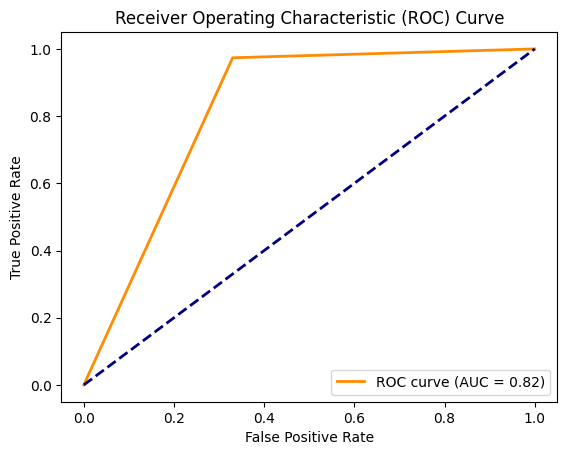

In [19]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, prediction)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()